# Activity 2.1 : Convolutional Neural Network

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
  |  
<u>**Hands-on Activity 3.1** | Convolutional Neural Network
**Name** | Corpuz, Micki Laurren B.
**Section** | CPE32S3
**Date Performed**: | 08 February 2026
**Date Submitted**: | 08 February 2026
**Instructor**: | Engr. Neal Barton James Matira

<hr>

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [4]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


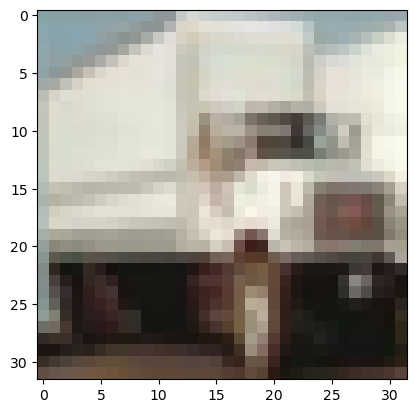

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [9]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [29]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3878 - accuracy: 0.5407 - val_loss: 1.5179 - val_accuracy: 0.5543
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3885 - accuracy: 0.5378 - val_loss: 1.5411 - val_accuracy: 0.4767
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3942 - accuracy: 0.5367 - val_loss: 1.5981 - val_accuracy: 0.4687
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4003 - accuracy: 0.5355 - val_loss: 1.2433 - val_accuracy: 0.5799
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4116 - accuracy: 0.5281 - val_loss: 1.3871 - val_accuracy: 0.5315


#### Supplementary Activity

> Achieve at least 90% Accuracy

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [24]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32, 
                   kernel_size=(5,5),
                   strides=(1,1),
                   padding='same',
                   activation='relu',
                   input_shape=x_train.shape[1:]))
model_2.add(Conv2D(32, (5,5), strides=(1,1), padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=64, 
                   kernel_size=(3,3),
                   strides=(1,1),
                   padding='same',
                   activation='relu'))
model_2.add(Conv2D(64, (3,3), strides=(1,1), padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.3))


model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [30]:
batch_size = 64

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(
                loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history_2 = model_2.fit(
                        x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=5,
                        validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 43s 54ms/step - loss: 0.7228 - accuracy: 0.7497 - val_loss: 0.7813 - val_accuracy: 0.7277
Epoch 2/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6799 - accuracy: 0.7633 - val_loss: 0.8569 - val_accuracy: 0.7101
Epoch 3/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6617 - accuracy: 0.7726 - val_loss: 0.7765 - val_accuracy: 0.7530
Epoch 4/5
782/782 [==============================] - 40s 52ms/step - loss: 0.6392 - accuracy: 0.7794 - val_loss: 0.7269 - val_accuracy: 0.7549
Epoch 5/5
782/782 [==============================] - 42s 53ms/step - loss: 0.6171 - accuracy: 0.7901 - val_loss: 0.8479 - val_accuracy: 0.7370


#### Output

> 1. Comparison of Model 1 and Model 2

In [34]:
import pandas as pd
df_model1 = pd.DataFrame(history_1.history)
df_model1['model'] = 'Model 1'
df_model1['epoch'] = df_model1.index + 1

df_model2 = pd.DataFrame(history_2.history)
df_model2['model'] = "Model 2"
df_model2['epoch'] = df_model2.index + 1

df1_df2 = pd.concat([df_model1, df_model2], ignore_index=True)

df1_df2


,loss,accuracy,val_loss,val_accuracy,model,epoch
0,1.387760,0.54072,1.517874,0.5543,Model 1,1
1,1.388537,0.53782,1.541093,0.4767,Model 1,2
2,1.394169,0.53668,1.598086,0.4687,Model 1,3
3,1.400250,0.53554,1.243251,0.5799,Model 1,4
4,1.411625,0.52814,1.387094,0.5315,Model 1,5
5,0.722786,0.74968,0.781272,0.7277,Model 2,1
6,0.679914,0.76326,0.856932,0.7101,Model 2,2
7,0.661703,0.77256,0.776493,0.7530,Model 2,3
8,0.639215,0.77944,0.726874,0.7549,Model 2,4
9,0.617101,0.79012,0.847906,0.7370,Model 2,5


**Interpretation:**

> Model 1's accuracy peaked during the fourth epoch at ~58%, with high (1.24) loss. In contrast, Model 2 demonstrates stronger generalization, reaching higher accuracy (75.49%) with relatively lower loss(~0.73), which indicates both correctness and confidence in predictions.Model 2 is clearly outperforming Model 1, both in terms of accuracy and confidence.




> 2. Achieve at least **90% accuracy** for both training and testing validations.

In [35]:
improve = Sequential()

improve.add(Conv2D(filters=64, 
                   kernel_size=(5,5),
                   strides=(1,1),
                   padding='same',
                   activation='relu',
                   input_shape=x_train.shape[1:]))
improve.add(Conv2D(64, (5,5), strides=(1,1), padding='same',
                   activation='relu'))
improve.add(MaxPooling2D(pool_size=(2,2)))
improve.add(Dropout(0.2))

improve.add(Conv2D(filters=128, 
                   kernel_size=(3,3),
                   strides=(1,1),
                   padding='same',
                   activation='relu'))
improve.add(Conv2D(128, (3,3), strides=(1,1), padding='same',
                   activation='relu'))
improve.add(MaxPooling2D(pool_size=(2,2)))
improve.add(Dropout(0.3))


improve.add(Flatten())
improve.add(Dense(512, activation='relu'))
improve.add(Dropout(0.5))
improve.add(Dense(num_classes, activation='softmax'))

improve.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)

improve.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

history_3 = improve.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_reduce]
)


Epoch 1/300
1563/1563 [==============================] - 135s 86ms/step - loss: 0.9201 - accuracy: 0.6807 - val_loss: 0.8872 - val_accuracy: 0.6961 - lr: 5.0000e-04
Epoch 2/300
1563/1563 [==============================] - 136s 87ms/step - loss: 0.8180 - accuracy: 0.7199 - val_loss: 0.8884 - val_accuracy: 0.7019 - lr: 5.0000e-04
Epoch 3/300
1563/1563 [==============================] - 137s 87ms/step - loss: 0.7754 - accuracy: 0.7388 - val_loss: 0.8101 - val_accuracy: 0.7270 - lr: 5.0000e-04
Epoch 4/300
1563/1563 [==============================] - 137s 88ms/step - loss: 0.7536 - accuracy: 0.7490 - val_loss: 0.7758 - val_accuracy: 0.7368 - lr: 5.0000e-04
Epoch 5/300
1563/1563 [==============================] - 140s 90ms/step - loss: 0.7475 - accuracy: 0.7521 - val_loss: 0.7535 - val_accuracy: 0.7659 - lr: 5.0000e-04
Epoch 6/300
1563/1563 [==============================] - 139s 89ms/step - loss: 0.7354 - accuracy: 0.7585 - val_loss: 0.8702 - val_accuracy: 0.7394 - lr: 5.0000e-04
Epoch 7/30

> I tried a different approach under this block

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Activation,
                                     Dropout, MaxPooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam

In [ ]:
model_3 = Sequential()

# Block 1
model_3.add(Conv2D(64, (1,1), padding="same",
                   input_shape=(32, 32, 3)))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(64, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(64, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model_3.add(Conv2D(128, (1,1), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(128, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(128, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))

# Block 3
model_3.add(Conv2D(256, (1,1), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(256, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(256, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))


model_3.add(Flatten())
model_3.add(Dense(10, activation="softmax"))

In [44]:
model_3.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=['accuracy']
)

model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        256       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 32, 32, 64)       

In [ ]:
batch_size3 = 128

history_4 = model_3.fit(
    x_train,
    y_train,
    epochs=700,
    batch_size=batch_size3,
    validation_data=(x_test, y_test)
)

Epoch 1/700
391/391 [==============================] - 573s 1s/step - loss: 2.3736 - accuracy: 0.3593 - val_loss: 2.2953 - val_accuracy: 0.2732
Epoch 2/700
391/391 [==============================] - 570s 1s/step - loss: 1.3143 - accuracy: 0.5363 - val_loss: 1.2947 - val_accuracy: 0.5379
Epoch 3/700
391/391 [==============================] - 572s 1s/step - loss: 1.0404 - accuracy: 0.6327 - val_loss: 1.3871 - val_accuracy: 0.5480
Epoch 4/700
391/391 [==============================] - 575s 1s/step - loss: 0.8517 - accuracy: 0.7010 - val_loss: 1.0467 - val_accuracy: 0.6401
Epoch 5/700
391/391 [==============================] - 578s 1s/step - loss: 0.7143 - accuracy: 0.7523 - val_loss: 0.8749 - val_accuracy: 0.6947
Epoch 6/700
391/391 [==============================] - 579s 1s/step - loss: 0.6044 - accuracy: 0.7898 - val_loss: 0.7918 - val_accuracy: 0.7344
Epoch 7/700
391/391 [==============================] - 595s 2s/step - loss: 0.5202 - accuracy: 0.8199 - val_loss: 0.7520 - val_accuracy:

#### Conclusion

> In this activity, convolutional neural networks (CNNs) were built and trained using the CIFAR-10 dataset to observe how different architectural choices affect model performance. The results showed that changing kernel sizes from smaller, fine-grained filters (such as 3×3) to larger ones (such as 5×5) helped the model capture both small details and broader patterns in the images. Increasing the number of convolutional filters also improved performance, as the model was able to learn more distinguishing features, which helped with generalization.

> Moreover, delaying downsampling by using stride-1 convolutions allowed the model to preserve information in the early layers. Meanwhile, ultimately skipping downsampling led to higher accuracy, although it came at the cost of longer training time and increased computational load. Batch normalization and dropout further helped stabilize training and reduce overfitting by keeping activations well-scaled and preventing the model from relying too heavily on specific neurons. Lastly, reducing the size of the dense layer from 512 to 256 to 10 neurons lowered the overall number of parameters, which helped improve generalization while still maintaining competitive classification accuracy.